#### Import libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_style("whitegrid")

#### Data Understanding and Loading:
Load the dataset

In [5]:
df = pd.read_csv("../data/MachineLearningRating_v3.txt" , delimiter='|')
df.head()


C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_3612\83524819.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt" , delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [8]:
df.shape

(1000098, 52)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

#### Check column types and ensure proper formatting:
Convert TransactionMonth to datetime

In [8]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

Verify categorical columns (e.g., Gender, Province) are strings or categorical:

In [9]:
df["Gender"] = df["Gender"].astype("category")
df["Province"] = df["Province"].astype("category")

#### Data Summarization:
Calculate descriptive statistics for numerical columns

In [10]:
numerical_cols = ["TotalPremium", "TotalClaims", "SumInsured", "CustomValueEstimate"]
df[numerical_cols].describe()

,TotalPremium,TotalClaims,SumInsured,CustomValueEstimate
count,1.000098e+06,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,6.041727e+05,2.255311e+05
std,2.302845e+02,2.384075e+03,1.508332e+06,5.645157e+05
min,-7.825768e+02,-1.200241e+04,1.000000e-02,2.000000e+04
25%,0.000000e+00,0.000000e+00,5.000000e+03,1.350000e+05
50%,2.178333e+00,0.000000e+00,7.500000e+03,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.500000e+05,2.800000e+05
max,6.528260e+04,3.930921e+05,1.263620e+07,2.655000e+07


Compute Loss Ratio (TotalClaims / TotalPremium)

In [11]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"].replace(0, np.nan)  # Avoid division by zero
print("Overall Loss Ratio:", df["LossRatio"].mean())
# Loss Ratio by Province, VehicleType, Gender
print(df.groupby("Province")["LossRatio"].mean())
print(df.groupby("VehicleType")["LossRatio"].mean())
print(df.groupby("Gender")["LossRatio"].mean())

Overall Loss Ratio: 0.3498846581363079
Province
Eastern Cape     0.235589
Free State       0.106209
Gauteng          0.428889
KwaZulu-Natal    0.264746
Limpopo          0.348712
Mpumalanga       0.392698
North West       0.285348
Northern Cape    0.203831
Western Cape     0.341750
Name: LossRatio, dtype: float64
VehicleType
Bus                  0.000000
Heavy Commercial     0.793617
Light Commercial     0.543917
Medium Commercial    0.493356
Passenger Vehicle    0.337368
Name: LossRatio, dtype: float64
Gender
Female           0.491979
Male             0.348852
Not specified    0.347904
Name: LossRatio, dtype: float64


C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_3612\3825630608.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Province")["LossRatio"].mean())
C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_3612\3825630608.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")["LossRatio"].mean())


#### Data Quality Assessment:
Check for missing values

In [12]:
missing = df.isnull().sum() / len(df) * 100
print("Missing Values (%):\n", missing[missing > 0])

Missing Values (%):
 Bank                        14.594670
AccountType                  4.022806
MaritalStatus                0.825819
Gender                       0.953507
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
Model                        0.055195
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
bodytype                     0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
CustomValueEstimate         77.956560
CapitalOutstanding           0.000200
NewVehicle                  15.327998
WrittenOff                  64.183810
Rebuilt                     64.183810
Converted                   64.183810
CrossBorder                 99.930207
NumberOfVehiclesInFleet    100.000000
LossRatio                   38.159660
dtype: float64


#### Handle missing values (if any):
###### Impute numerical: df["TotalPremium"].fillna(df["TotalPremium"].mean(), inplace=True)
###### Impute categorical: df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


#### Check for duplicates

In [13]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


#### Univariate Analysis:
Plot histograms for numerical variables

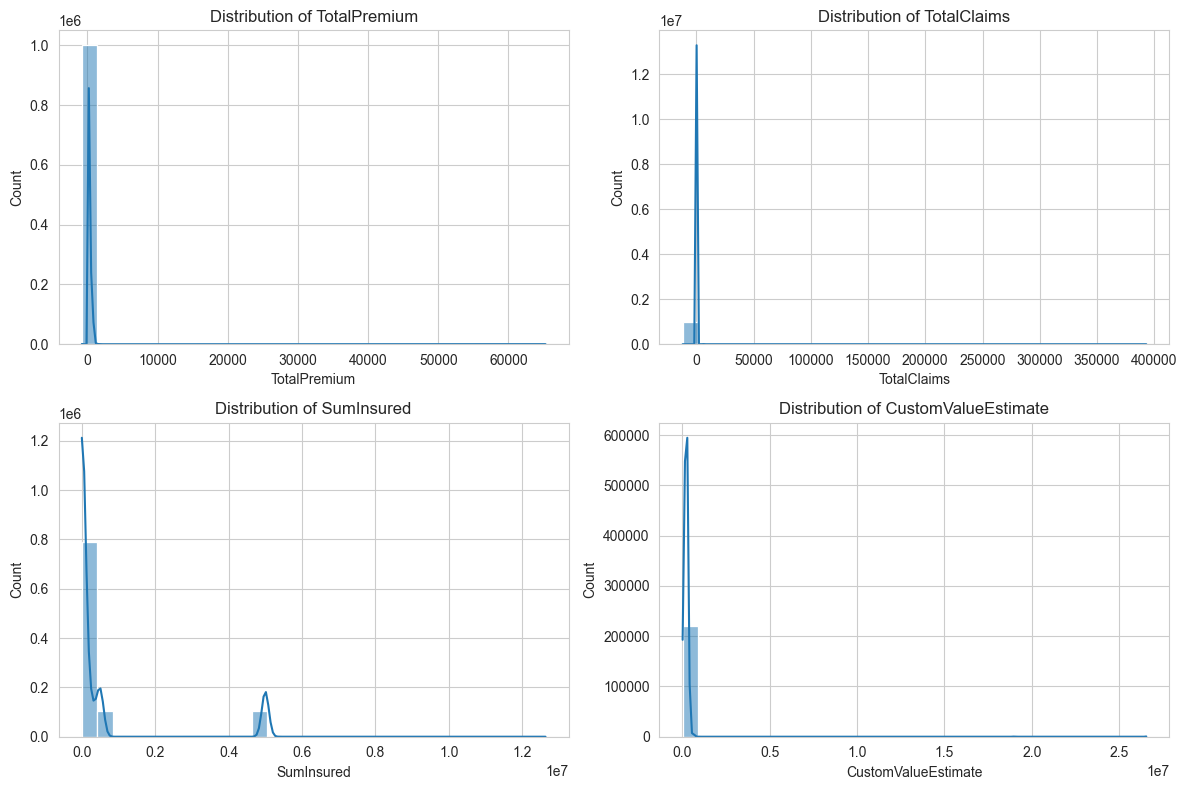

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("./plots/histograms.png")
plt.show()

Plot bar charts for categorical variables:

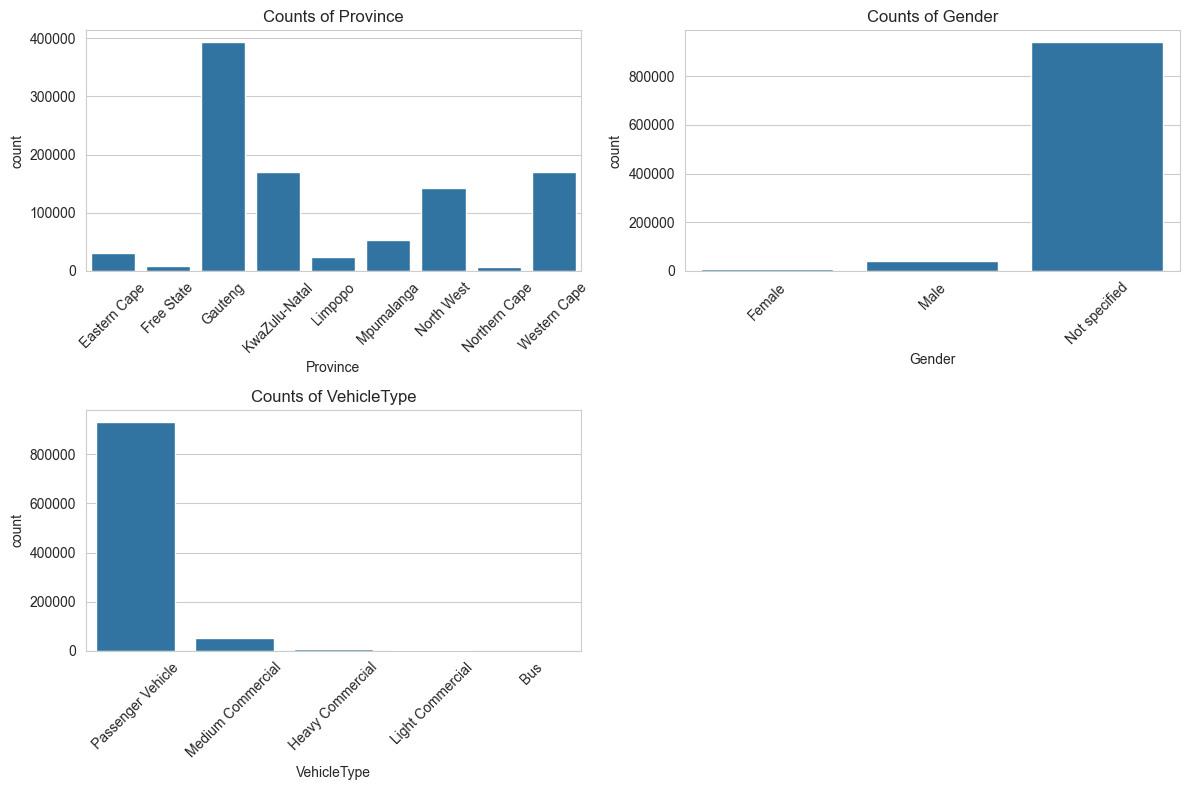

In [15]:
categorical_cols = ["Province", "Gender", "VehicleType"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./plots/bar_charts.png")
plt.show()

#### Bivariate/Multivariate Analysis:
Correlation matrix for numerical variables

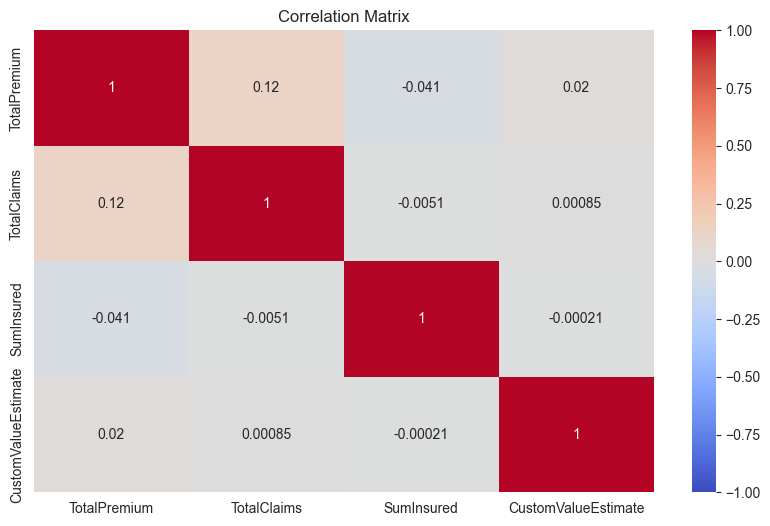

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.savefig("./plots/correlation_matrix.png")
plt.show()

Scatter plot for TotalPremium vs. TotalClaims by ZipCode

C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_3612\4205991304.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./plots/scatter_premium_claims.png")
c:\Users\Surafel Destaw\Documents\Kifya_projects\W03-Insurance-Risk-Analytics-and-Predictive-Modeling\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


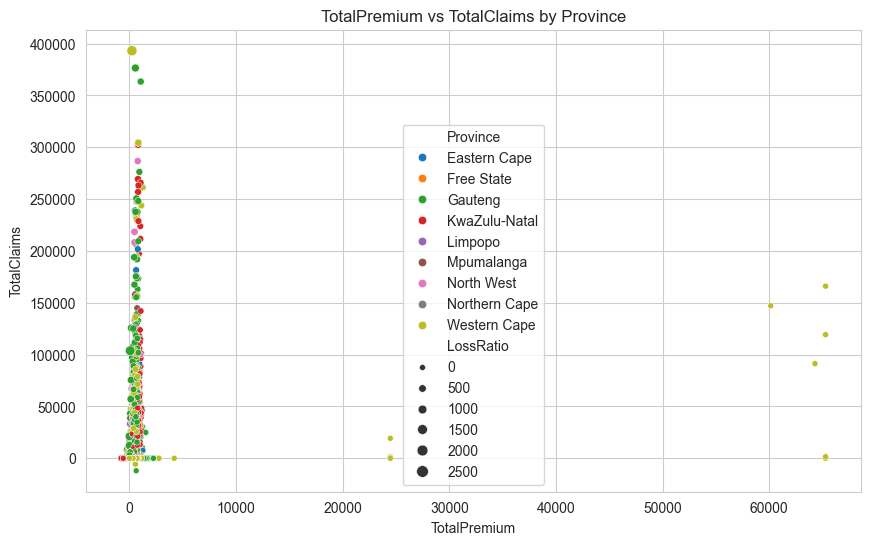

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", hue="Province", size="LossRatio")
plt.title("TotalPremium vs TotalClaims by Province")
plt.savefig("./plots/scatter_premium_claims.png")
plt.show()

#### Temporal Trends:
Group by TransactionMonth to analyze claim frequency and severity

C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_16860\3241326674.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  monthly_trends.plot(subplots=True, ax=plt.gca())


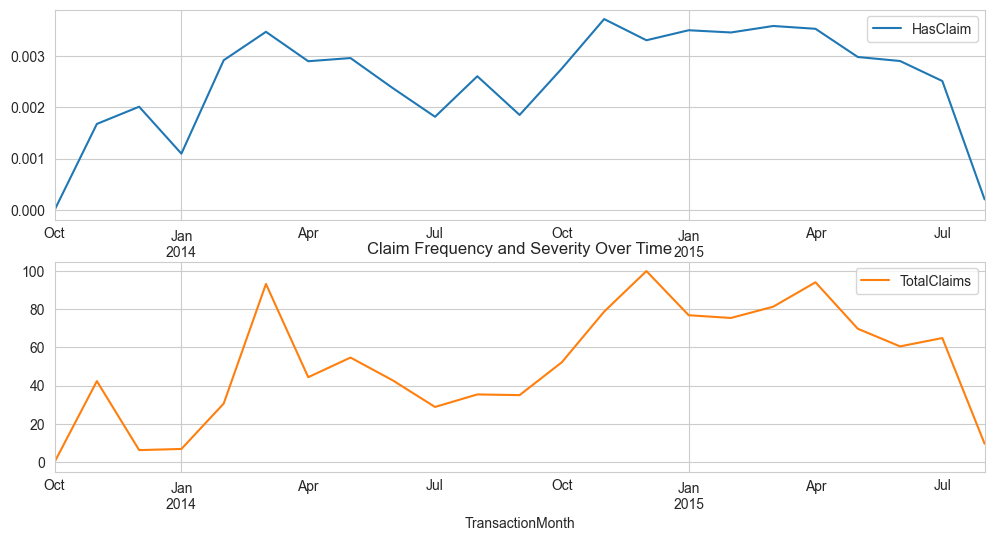

In [27]:
df["HasClaim"] = df["TotalClaims"] > 0
monthly_trends = df.groupby(df["TransactionMonth"].dt.to_period("M")).agg({
    "HasClaim": "mean",  # Claim frequency
    "TotalClaims": "mean"  # Claim severity (overall, not just claims > 0)
})
plt.figure(figsize=(12, 6))
monthly_trends.plot(subplots=True, ax=plt.gca())
plt.title("Claim Frequency and Severity Over Time")
plt.savefig("./plots/temporal_trends.png")
plt.show()

#### Outlier Detection:
Use box plots to identify outliers:

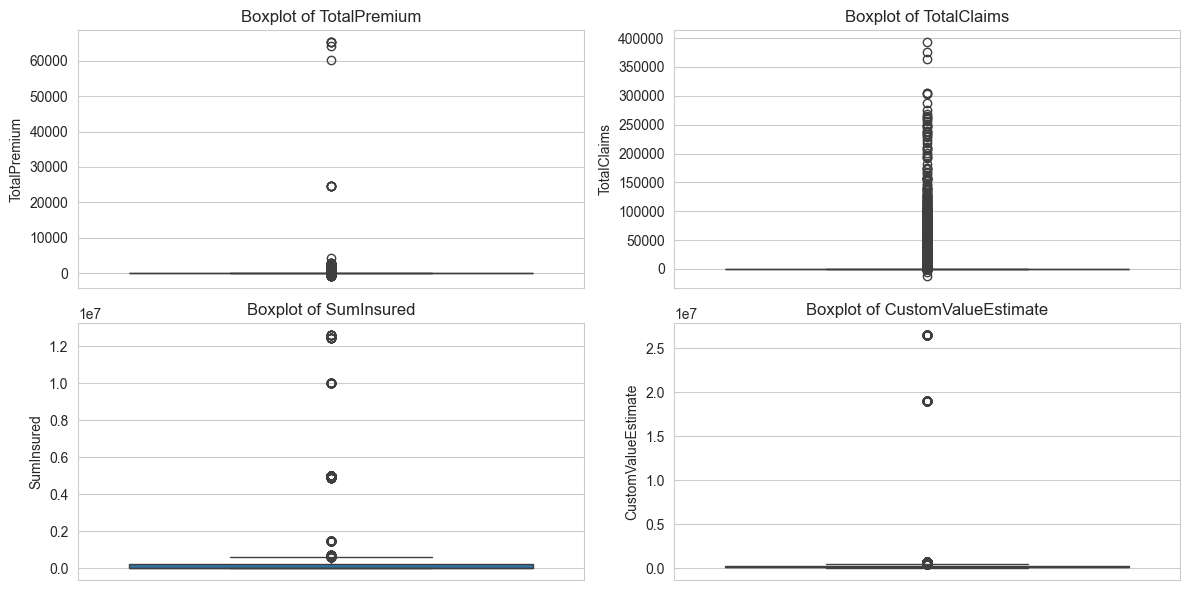

In [28]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.savefig("./plots/boxplots.png")
plt.show()

Quantify outliers using IQR:

In [30]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in TotalPremium: 209042
Outliers in TotalClaims: 2793
Outliers in SumInsured: 104294
Outliers in CustomValueEstimate: 1785


#### Vehicle Insights:
Analyze claims by vehicle Make and Model:

Top 5 Makes/Models by Average Claim Amount:
                                                   mean  count
make          Model                                          
TOYOTA        L/CRUISER FJ 4.0 V6 CRUISER  5340.970273     72
HYUNDAI       H-1 2.5 CRDI WAGON A/T       4118.181043    108
FIAT          DUCATO 2.3 JTD VETRATO       1014.681021     99
VOLKSWAGEN    POLO VIVO 1.6 5Dr             827.558882     80
MERCEDES-BENZ C180 BE COUPE                 743.459027    392


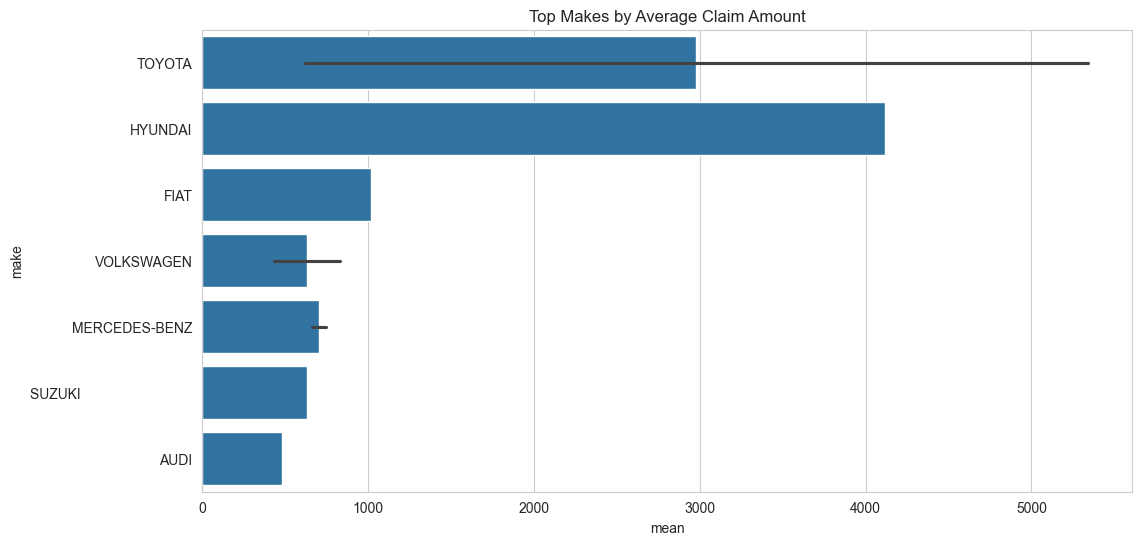

In [34]:
vehicle_claims = df.groupby(["make", "Model"])["TotalClaims"].agg(["mean", "count"]).sort_values("mean", ascending=False)
print("Top 5 Makes/Models by Average Claim Amount:\n", vehicle_claims.head())
plt.figure(figsize=(12, 6))
sns.barplot(data=vehicle_claims.head(10).reset_index(), x="mean", y="make")
plt.title("Top Makes by Average Claim Amount")
plt.savefig("./plots/vehicle_claims.png")
plt.show()

#### Three Creative Visualizations:
Visualization 1: Loss Ratio by Province and Gender

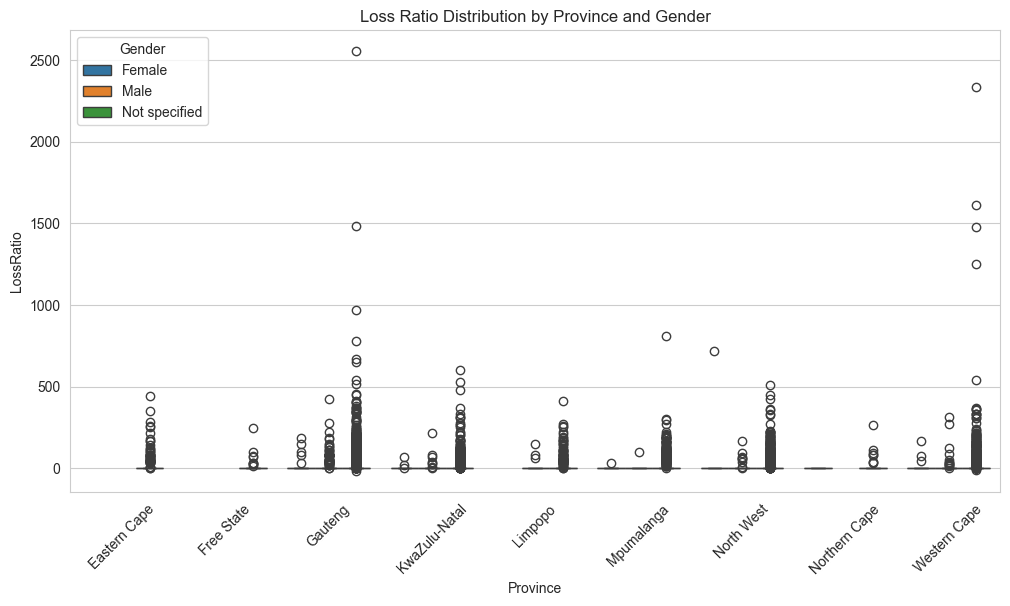

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Province", y="LossRatio", hue="Gender")
plt.title("Loss Ratio Distribution by Province and Gender")
plt.xticks(rotation=45)
plt.savefig("./plots/loss_ratio_province_gender.png")
plt.show()

Visualization 2: Time-Series Heatmap of Claims by Month and Province

C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_16860\1557721977.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="TotalClaims", index=df["TransactionMonth"].dt.to_period("M"), columns="Province", aggfunc="mean")


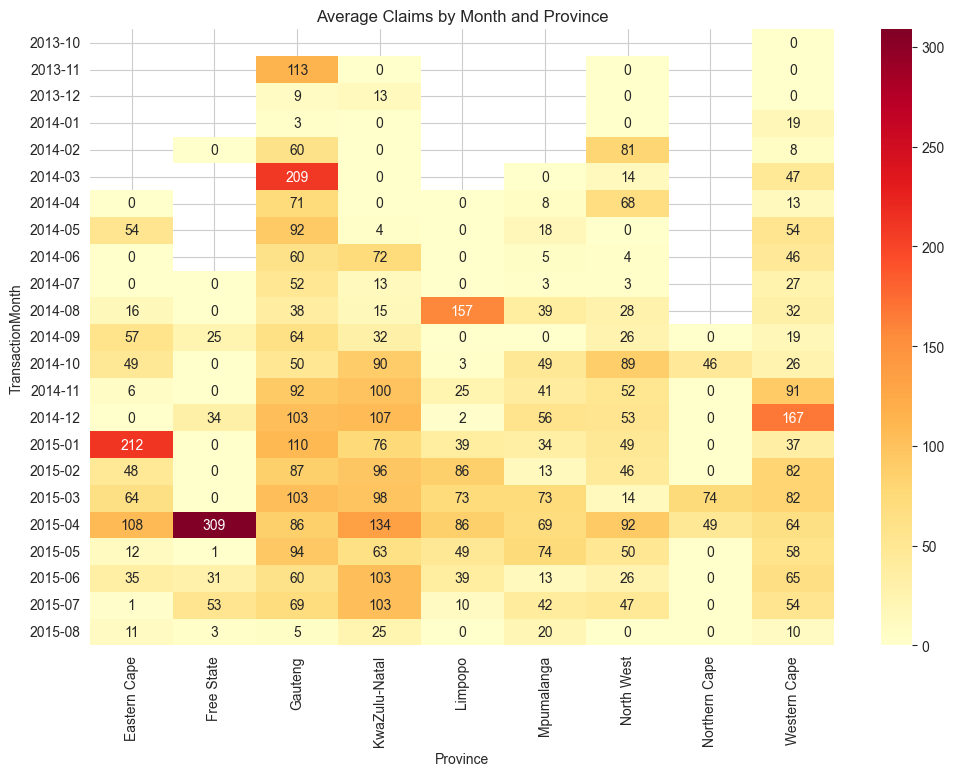

In [36]:
pivot_table = df.pivot_table(values="TotalClaims", index=df["TransactionMonth"].dt.to_period("M"), columns="Province", aggfunc="mean")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Average Claims by Month and Province")
plt.savefig("./plots/claims_heatmap.png")
plt.show()

Visualization 3: Pair Plot of Financial Variables

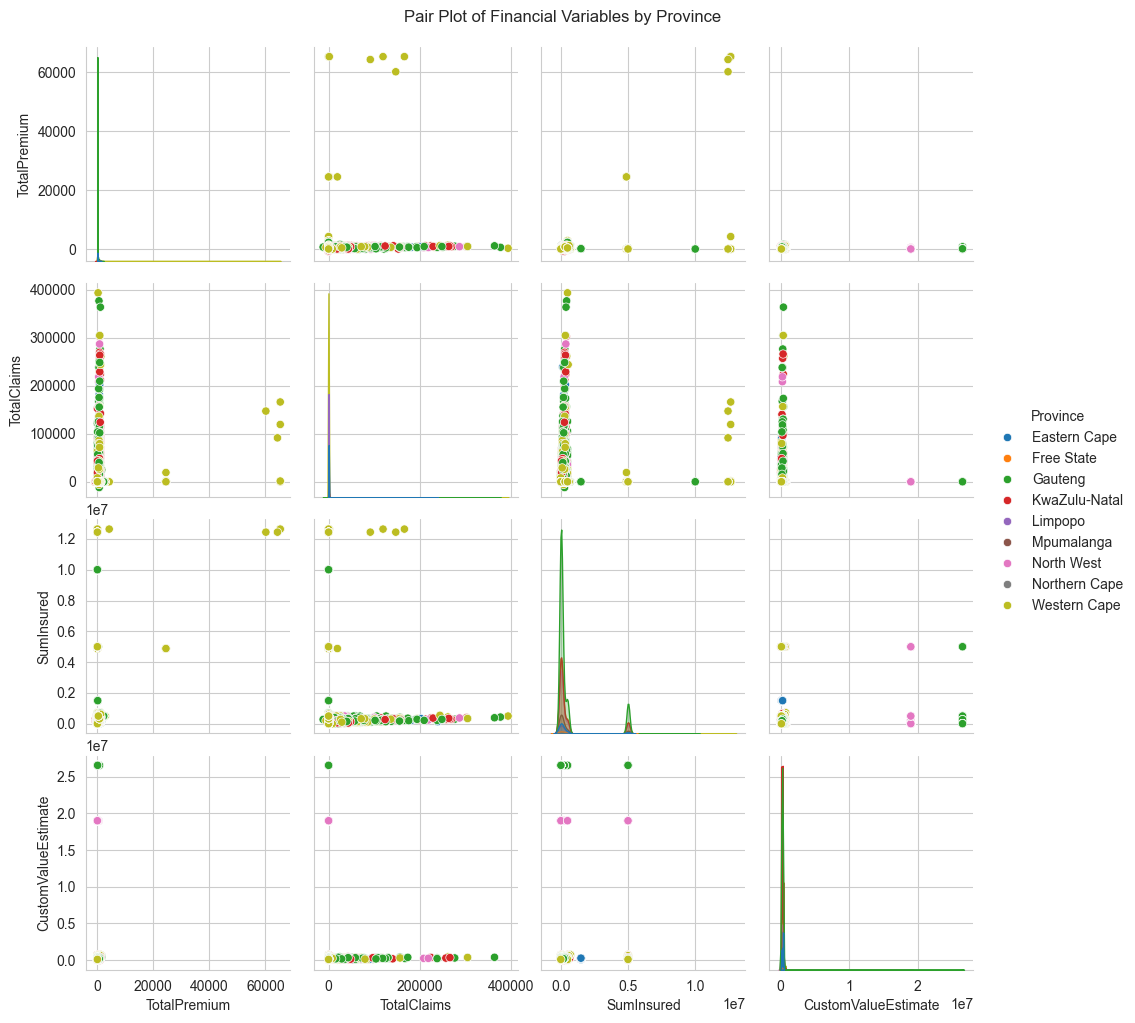

In [18]:
sns.pairplot(df[numerical_cols + ["Province"]], hue="Province", diag_kind="kde")
plt.suptitle("Pair Plot of Financial Variables by Province", y=1.02)
plt.savefig("./plots/pair_plot.png")
plt.show()

#### Statistical Thinking:
Use statistical distributions (log-normal for TotalClaims due to right-skew):

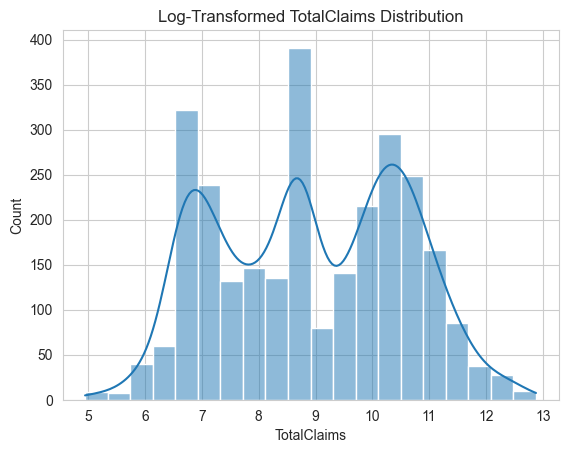

In [19]:
log_claims = np.log1p(df["TotalClaims"][df["TotalClaims"] > 0])
sns.histplot(log_claims, kde=True)
plt.title("Log-Transformed TotalClaims Distribution")
plt.savefig("./plots/log_claims.png")
plt.show()

Test normality

In [20]:
stat, p = stats.shapiro(df["TotalPremium"].sample(500))  # Subsample for large datasets
print("Shapiro-Wilk Test for TotalPremium:", p)

Shapiro-Wilk Test for TotalPremium: 5.877278889829738e-36
